In [214]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
#pd.read_csv(r'C:\Users\USER\Desktop\Rahima Sumani\OQD\OQD_DATASET\Q_Purchase_Behaviour.csv') #loading file from a folder within the computer
purchase= pd.read_excel('Q_Purchase_Behaviour.xlsx')# loading file from a folder within anaconda
trans=pd.read_excel('Q_Transaction_Data.xlsx')


### DATA INSPECTION

In [217]:
purchase.shape

(72637, 3)

In [218]:
purchase.size


217911

In [219]:
purchase.dtypes


LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [220]:
purchase.describe() #provides the statistical values of integer data type

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [221]:
purchase.describe(include=['O'])#provides statiscal values of of the categorical data type

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


In [222]:
purchase.head() #first 5 rows

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [223]:
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### DATA TRANSFORMATION

In [225]:
trans['DATE']=pd.to_datetime(trans['DATE'])
#trans['DATE']=pd.to_datetime(trans['DATE'], origin= '1899-12-30', unit='D')#fixes bug in a date
print(trans['DATE'].dtype)
trans['DATE'].head()

datetime64[ns]


0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [226]:
trans.loc[trans['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [227]:
trans = trans[trans['PROD_QTY']!=200]

In [228]:
#df.dropna()
#df.drop(['date'])
#df.fillna(df['unit'], inplace = True) #the original column gets overwritten
#df['date']=pd.to_datetime(df['data'])
#df['date']=df['date'].astype('float')
#df['price']= df['quant']*df['unit']


### MERGED DATASET

In [230]:
merge_df = pd.merge(trans, purchase, on = 'LYLTY_CARD_NBR')  #inner rows
#trans['LYLTY_CARD_NBR'].nunique()
#pd.merge(trans, purchase, on='LYLTY_CARD_NBR', how='left')   # keep all rows from trans
#pd.merge(trans, purchase, on='LYLTY_CARD_NBR', how='right')  # keep all rows from purchase
#merge_df = pd.merge(trans, purchase, on='LYLTY_CARD_NBR', how='outer')  # keep all rows from both
merge_df.info()
merge_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   LIFESTAGE         264834 non-null  object        
 9   PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [231]:
merge_df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [232]:
cat_cols = merge_df.select_dtypes(include = ['O']).columns.tolist()
cat_cols  


['PROD_NAME', 'LIFESTAGE', 'PREMIUM_CUSTOMER']

In [233]:
#for cols in cat_cols:
#    merge_df[cols] = merge_df[cols].astype('category')

In [234]:
 merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   LIFESTAGE         264834 non-null  object        
 9   PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


##ANALYSIS


### 1 TOTAL SALES BY LIFESTAGE AND PREMIUM SEGMENT


In [237]:
sales_by_segment = merge_df.groupby(['LIFESTAGE'])['TOT_SALES'].sum().reset_index()#reset_index puts all the groups into columns
sales_by_segment= sales_by_segment.sort_values(by='TOT_SALES', ascending=False)
sales_by_segment

,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
2,OLDER FAMILIES,352467.20
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45


<function matplotlib.pyplot.show(close=None, block=None)>

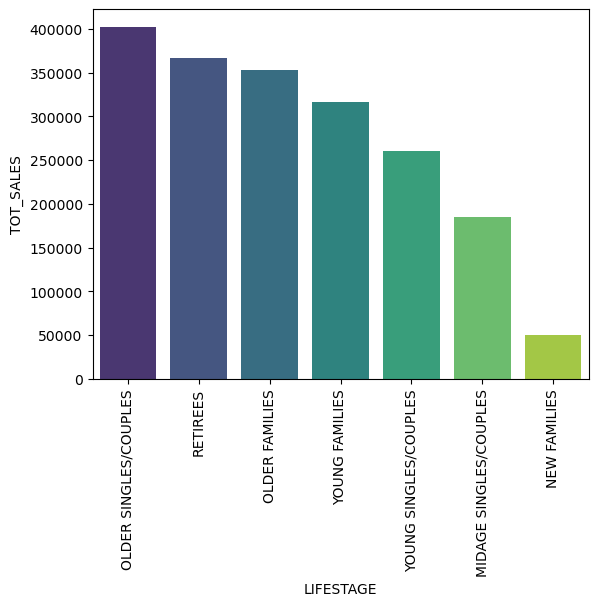

In [238]:
#.figure(figsize=10,8)
sns.barplot(sales_by_segment, x = 'LIFESTAGE', y = 'TOT_SALES', palette = 'viridis',  hue = 'LIFESTAGE' )
plt.xticks(rotation = 90)
plt.show


### 2 COUNT OF CUSTOMERS IN EACH SEGMENT


In [240]:
customer_count = merge_df.groupby(['LIFESTAGE'])['LYLTY_CARD_NBR'].nunique().reset_index()#reset_index puts all the groups into columns
customer_count= customer_count.sort_values(by='LYLTY_CARD_NBR', ascending=False)
customer_count

,LIFESTAGE,LYLTY_CARD_NBR
4,RETIREES,14805
3,OLDER SINGLES/COUPLES,14609
6,YOUNG SINGLES/COUPLES,14441
2,OLDER FAMILIES,9779
5,YOUNG FAMILIES,9178
0,MIDAGE SINGLES/COUPLES,7275
1,NEW FAMILIES,2549


<function matplotlib.pyplot.show(close=None, block=None)>

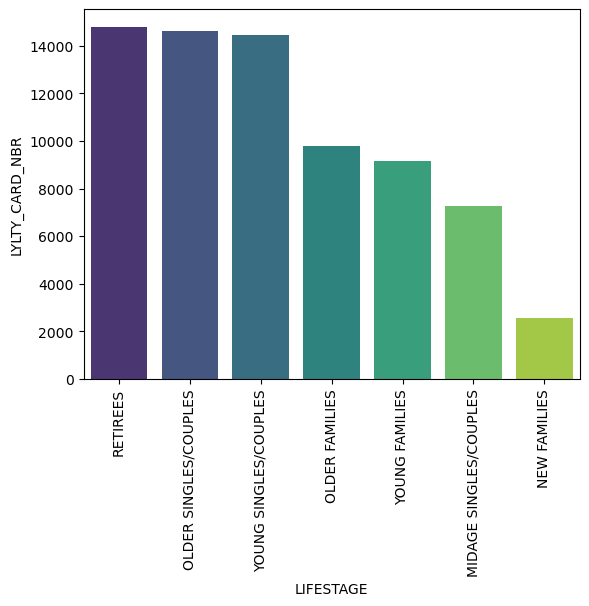

In [241]:
sns.barplot(customer_count, x = 'LIFESTAGE', y = 'LYLTY_CARD_NBR', palette = 'viridis',  hue = 'LIFESTAGE' )
plt.xticks(rotation = 90)
plt.show


### 3 TOTAL CHIPS BOUGHT PER CUSTOMER PER SEGMENT

In [243]:
customer_count = merge_df.groupby(['LIFESTAGE'])['PROD_QTY'].sum().reset_index()#reset_index puts all the groups into columns
customer_count= customer_count.sort_values(by='PROD_QTY', ascending=False)
customer_count

,LIFESTAGE,PROD_QTY
3,OLDER SINGLES/COUPLES,104203
2,OLDER FAMILIES,94592
4,RETIREES,94166
5,YOUNG FAMILIES,84561
6,YOUNG SINGLES/COUPLES,66634
0,MIDAGE SINGLES/COUPLES,47721
1,NEW FAMILIES,12847


<function matplotlib.pyplot.show(close=None, block=None)>

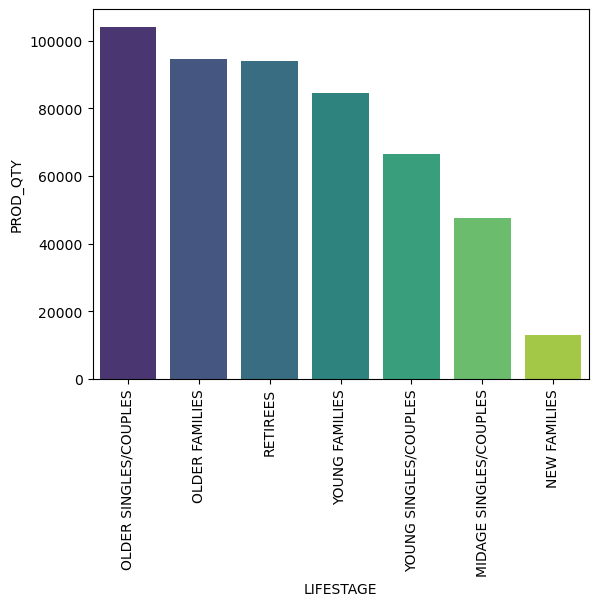

In [244]:
sns.barplot(customer_count, x = 'LIFESTAGE', y = 'PROD_QTY', palette = 'viridis',  hue = 'LIFESTAGE' )
plt.xticks(rotation = 90)
plt.show

### 4 AVERAGE CHIP PRICE PER CUSTOMER SEGMENT

In [246]:
merge_df['UNIT_PRICE'] = merge_df['TOT_SALES']/merge_df['PROD_QTY']  

In [247]:
merge_df['UNIT_PRICE'].head()

0    3.00
1    2.10
2    1.45
3    3.00
4    4.60
Name: UNIT_PRICE, dtype: float64

In [248]:
avg_price_segment = merge_df.groupby(['LIFESTAGE'])['UNIT_PRICE'].mean().reset_index()
avg_price_segment

,LIFESTAGE,UNIT_PRICE
0,MIDAGE SINGLES/COUPLES,3.864922
1,NEW FAMILIES,3.907443
2,OLDER FAMILIES,3.724983
3,OLDER SINGLES/COUPLES,3.855725
4,RETIREES,3.884459
5,YOUNG FAMILIES,3.739539
6,YOUNG SINGLES/COUPLES,3.887723


### 5 TOP 5 SELLING CHIPS

In [250]:
top_5_sellin_prod = merge_df.groupby(['PROD_NAME'])['TOT_SALES'].sum().reset_index()#reset_index puts all the groups into columns
top_5_sellin_prod= top_5_sellin_prod.sort_values(by='TOT_SALES', ascending=False).head()
top_5_sellin_prod

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,39052.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
33,Kettle Mozzarella Basil & Pesto 175g,34457.4
76,Smiths Crinkle Original 330g,34302.6


<function matplotlib.pyplot.show(close=None, block=None)>

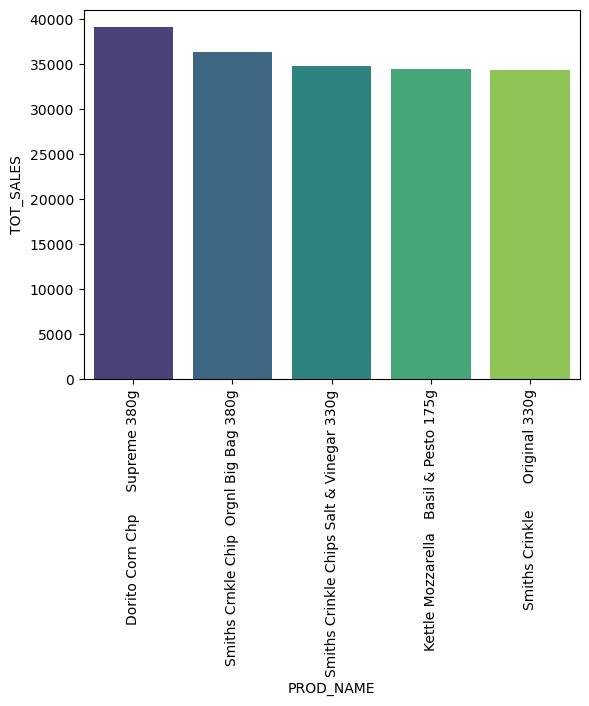

In [251]:
sns.barplot(top_5_sellin_prod, x = 'PROD_NAME', y = 'TOT_SALES', palette = 'viridis',  hue = 'PROD_NAME' )
plt.xticks(rotation = 90)
plt.show

### TOP 5 SALES BY STORE

In [253]:
top_5_sales_by_store = merge_df.groupby(['STORE_NBR'])['TOT_SALES'].sum().reset_index()
top_5_sales_by_store = top_5_sales_by_store.sort_values(by='TOT_SALES', ascending=False).head()
top_5_sales_by_store

,STORE_NBR,TOT_SALES
225,226,17605.45
87,88,16333.25
164,165,15973.75
39,40,15559.50
236,237,15539.50


<function matplotlib.pyplot.show(close=None, block=None)>

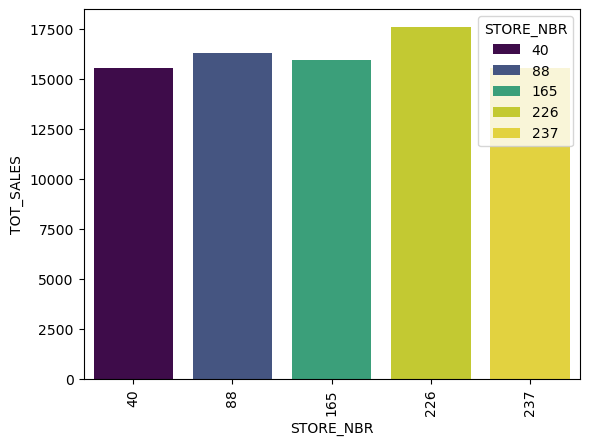

In [254]:
sns.barplot(top_5_sales_by_store, x = 'STORE_NBR', y = 'TOT_SALES', palette = 'viridis',  hue = 'STORE_NBR' )
plt.xticks(rotation = 90)
plt.show

### Top 5 stores by product quantity


In [256]:
top_5_stores_by_qty = merge_df.groupby(['STORE_NBR'])['PROD_QTY'].sum().reset_index()
top_5_stores_by_qty  = top_5_stores_by_qty.sort_values(by='PROD_QTY', ascending=False).head()
top_5_stores_by_qty 

,STORE_NBR,PROD_QTY
225,226,4001
87,88,3718
92,93,3639
164,165,3602
42,43,3519


<function matplotlib.pyplot.show(close=None, block=None)>

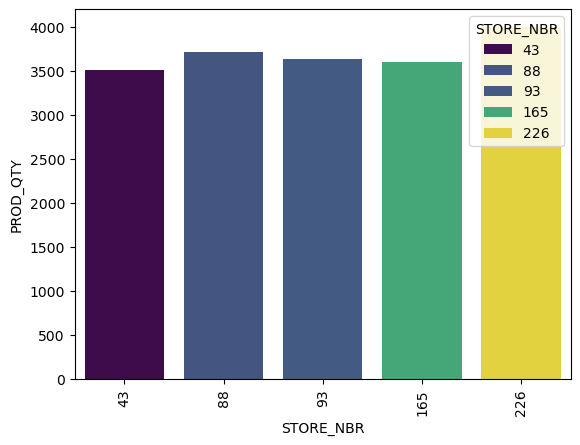

In [257]:
sns.barplot(top_5_stores_by_qty, x = 'STORE_NBR', y = 'PROD_QTY', palette = 'viridis',  hue = 'STORE_NBR' )
plt.xticks(rotation = 90)
plt.show

### MONTH WITH THE HIGHEST SALES

In [259]:
merge_df['MONTH'] =  merge_df['DATE'].dt.to_period('M')

In [260]:
monthly_sales= merge_df.groupby(['MONTH'])['TOT_SALES'].sum().reset_index()
monthly_sales= monthy_sales.sort_values(by='TOT_SALES', ascending=False).head(1)
monthly_sales

,MONTH,TOT_SALES
5,2018-12,167913.4


### OR

In [262]:
monthly_sales= merge_df.groupby(['MONTH'])['TOT_SALES'].sum().reset_index()
highest_monthly_sales= monthy_sales.loc[monthy_sales['TOT_SALES'].idxmax()]
highest_monthly_sales

MONTH         2018-12
TOT_SALES    167913.4
Name: 5, dtype: object

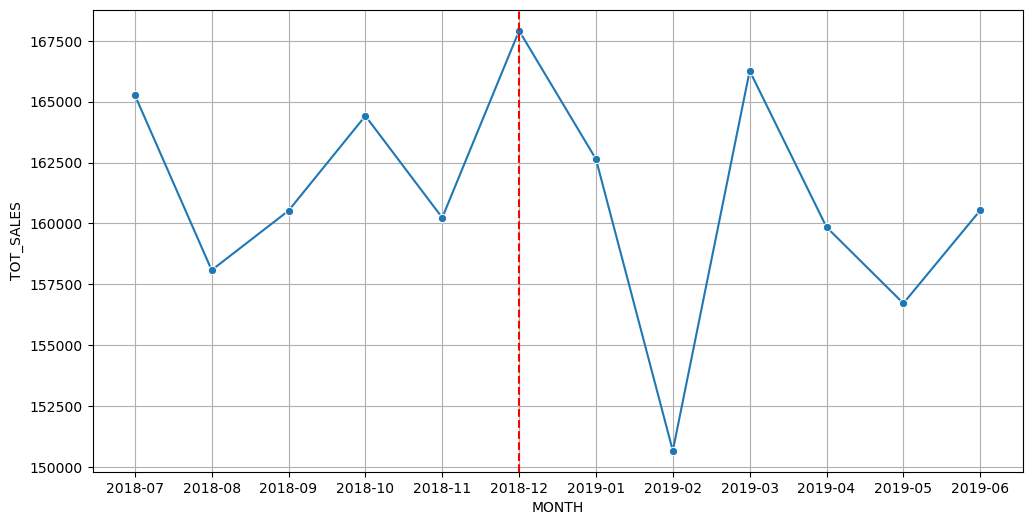

In [274]:
monthly_sales = monthly_sales.sort_values(by = 'MONTH')
monthly_sales['MONTH']= monthly_sales['MONTH'].astype(str)
plt.figure(figsize = (12,6))
sns.lineplot(x = 'MONTH', y='TOT_SALES', data=monthly_sales, marker = 'o', linestyle='-' )
plt.axvline(x = str(highest_monthly_sales['MONTH']),color = 'r',linestyle ='--', label = 'highest_sales_month')
plt.grid(True)